# DS-SF-23 | Codealong 07 | Introduction to Regression and Model Fit, Part 2

In [13]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Activity | Model's F-statistic

In [14]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-start.csv'), index_col = 'ID')

In [15]:
# TODO

smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                Tue, 31 May 2016   Prob (F-statistic):              0.780
Time:                        18:35:54   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
smf.ols(formula = 'SalePrice ~ Size', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Tue, 31 May 2016   Prob (F-statistic):           2.67e-58
Time:                        18:35:56   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Accessing the model's F-value and its p-value

### F-value (with significance level of `5%`)

In [17]:
model.fvalue

NameError: name 'model' is not defined

### Corresponding p-value

In [12]:
model.f_pvalue

NameError: name 'model' is not defined

## Part A - Linear Modeling with `sklearn`

In [12]:
# TODO
subset_df=df.dropna(axis = 'index', subset = ['Size', 'LotSize', 'IsAStudio'])

In [13]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X, y)

    print 'F-statistic (performed for each regressor independently)'
    print '- F-value', feature_selection.f_regression(X, y)[0]
    print '- p-value', feature_selection.f_regression(X, y)[1]
    print 'R^2 =', model.score(X, y)
    print 'Coefficients'
    print '- beta_0 (intercept) =', model.intercept_
    print '- beta_n (n > 0)     =', model.coef_

### SalePrice ~ IsAStudio with `statsmodels`

In [14]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Thu, 26 May 2016   Prob (F-statistic):              0.616
Time:                        21:17:55   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `sklearn` (Simple Linear Modeling)

In [15]:
X = subset_df[ ['IsAStudio'] ]
y = subset_df.SalePrice

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 0.25187926]
- p-value [ 0.61595836]
R^2 = 0.000463650973037
Coefficients
- beta_0 (intercept) = 1.55707559924
- beta_n (n > 0)     = [ 0.2589244]


### SalePrice ~ Size + LotSize with `statsmodels`

In [16]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Thu, 26 May 2016   Prob (F-statistic):           1.36e-30
Time:                        21:19:51   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `sklearn` (Multiple Linear Modeling)

In [17]:
X = subset_df[ ['Size', 'LotSize'] ]
y = subset_df.SalePrice

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]
R^2 = 0.224134357118
Coefficients
- beta_0 (intercept) = -0.190237755455
- beta_n (n > 0)     = [ 0.81709073  0.05004893]


# Advertising dataset

In [18]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

In [19]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


## Plots

### Sales ~ TV

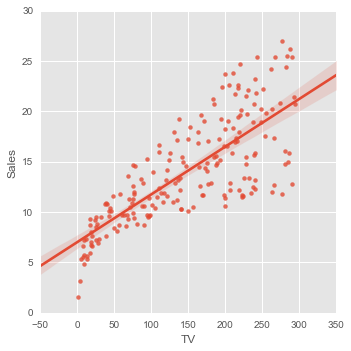

In [20]:
# TODO
sns.lmplot('TV', 'Sales', df)

### Sales ~ Radio

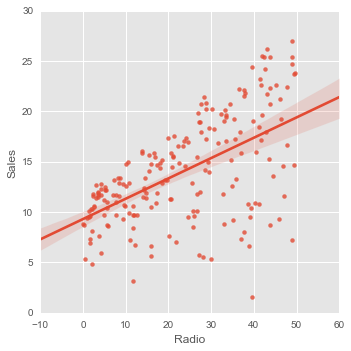

In [21]:
# TODO
sns.lmplot('Radio', 'Sales', df)

### Sales ~ Newspaper

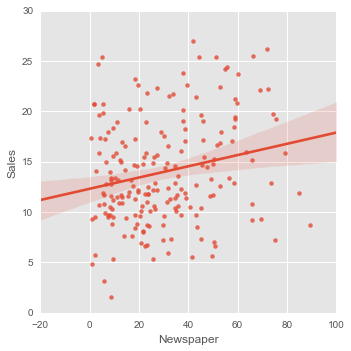

In [22]:
# TODO
sns.lmplot('Newspaper', 'Sales', df)

## Simple linear regressions

### Sales ~ TV

In [23]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

In [24]:
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 26 May 2016   Prob (F-statistic):           1.29e-41
Time:                        21:26:22   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Radio

In [28]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

In [27]:
model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Radio   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 26 May 2016   Prob (F-statistic):           5.99e-19
Time:                        21:26:46   Log-Likelihood:                -774.78
No. Observations:                 198   AIC:                             1554.
Df Residuals:                     196   BIC:                             1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0675      2.489      0.027      0.978        -4.840     4.975
Sales          1.6496      0.167      9.884      0.000         1.320     1.979
==============================================================================
Omnibus:                       16.344   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.557
Skew:                           0.750   Prob(JB):                     9.34e-05
Kurtosis:                       3.030   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Newspaper

In [29]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

In [30]:
model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Thu, 26 May 2016   Prob (F-statistic):            0.00188
Time:                        21:27:06   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

### Sales ~ TV

In [10]:
# TODO
model_tv.resid

NameError: name 'model_tv' is not defined

In [ ]:
# TODO

### Sales ~ Radio

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ Newspaper

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ TV + Radio

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part B - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part C - Binary/Dummy Variables

In [ ]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-start.csv'), index_col = 'ID')

In [ ]:
# TODO

In [ ]:
# TODO

### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

In [ ]:
# TODO

### We can create the binary variables manually

In [ ]:
# TODO

In [ ]:
df.columns

### But we can also use `get_dummies` from `pandas` as well (on `BedCount` for the sake of variety)

In [ ]:
# TODO

In [ ]:
beds_df

In [ ]:
beds_df.rename(columns={'Bed_1.0': 'Bed_1',
                        'Bed_2.0': 'Bed_2',
                        'Bed_3.0': 'Bed_3',
                        'Bed_4.0': 'Bed_4',
                        'Bed_5.0': 'Bed_5',
                        'Bed_6.0': 'Bed_6',
                        'Bed_7.0': 'Bed_7',
                        'Bed_8.0': 'Bed_8',
                        'Bed_9.0': 'Bed_9'}, inplace = True)

In [ ]:
beds_df

In [ ]:
df = df.join([beds_df])

In [ ]:
df.columns

### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO